In [1]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [6]:
# llegir el fitxer i assignar-lo a un DataFrame
datosp = pd.read_csv('movies.dat', sep='::', header=None, names=['id', 'title', 'raw_genres'],encoding='latin-1')
datosp[:20]

,id,title,raw_genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
# Extreure l'any de llançament i assignar-lo a una nova columna
datosp["year"] = datosp["title"].str.extract(r"\((\d{4})\)")

print(datosp)

        id                               title                    raw_genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   
...    ...                                 ...                           ...   
3878  3948             Meet the Parents (2000)                        Comedy   
3879  3949          Requiem for a Dream (2000)                         Drama   
3880  3950                    Tigerland (2000)                         Drama   
3881  3951             Two Family House (2000)                         Drama   
3882  3952               Contender, The (2000)                Drama|Thriller   

      year  
0     1995  
1     1995  


In [8]:
# Eliminar anys de la columna "title"
datosp["title"] = datosp["title"].str.replace(r"\(\d{4}\)","")
print(datosp)

        id                         title                    raw_genres  year
0        1                    Toy Story    Animation|Children's|Comedy  1995
1        2                      Jumanji   Adventure|Children's|Fantasy  1995
2        3             Grumpier Old Men                 Comedy|Romance  1995
3        4            Waiting to Exhale                   Comedy|Drama  1995
4        5  Father of the Bride Part II                         Comedy  1995
...    ...                           ...                           ...   ...
3878  3948             Meet the Parents                         Comedy  2000
3879  3949          Requiem for a Dream                          Drama  2000
3880  3950                    Tigerland                          Drama  2000
3881  3951             Two Family House                          Drama  2000
3882  3952               Contender, The                 Drama|Thriller  2000

[3883 rows x 4 columns]


In [9]:
# Crea una nova columna per a cada gènere
datosp = datosp.join(datosp.pop("raw_genres").str.split("|", expand=True))
print(datosp)

        id                         title  year          0           1  \
0        1                    Toy Story   1995  Animation  Children's   
1        2                      Jumanji   1995  Adventure  Children's   
2        3             Grumpier Old Men   1995     Comedy     Romance   
3        4            Waiting to Exhale   1995     Comedy       Drama   
4        5  Father of the Bride Part II   1995     Comedy        None   
...    ...                           ...   ...        ...         ...   
3878  3948             Meet the Parents   2000     Comedy        None   
3879  3949          Requiem for a Dream   2000      Drama        None   
3880  3950                    Tigerland   2000      Drama        None   
3881  3951             Two Family House   2000      Drama        None   
3882  3952               Contender, The   2000      Drama    Thriller   

            2     3     4     5  
0      Comedy  None  None  None  
1     Fantasy  None  None  None  
2        None  None  

In [10]:
# Crea una funció per seleccionar el primer gènere
def get_first_genre(row):
    return row.iloc[2]
# Aplica la funció a cada fila i crea una nova columna per al gènere seleccionat
datosp["genre"] = datosp.apply(get_first_genre, axis=1)
print(datosp)

        id                         title  year          0           1  \
0        1                    Toy Story   1995  Animation  Children's   
1        2                      Jumanji   1995  Adventure  Children's   
2        3             Grumpier Old Men   1995     Comedy     Romance   
3        4            Waiting to Exhale   1995     Comedy       Drama   
4        5  Father of the Bride Part II   1995     Comedy        None   
...    ...                           ...   ...        ...         ...   
3878  3948             Meet the Parents   2000     Comedy        None   
3879  3949          Requiem for a Dream   2000      Drama        None   
3880  3950                    Tigerland   2000      Drama        None   
3881  3951             Two Family House   2000      Drama        None   
3882  3952               Contender, The   2000      Drama    Thriller   

            2     3     4     5 genre  
0      Comedy  None  None  None  1995  
1     Fantasy  None  None  None  1995  
2  

In [11]:
# Elimina les columnes innecessàries
datosp = datosp.drop(columns=[1, 2,3,4,5])
print(datosp)

        id                         title  year          0 genre
0        1                    Toy Story   1995  Animation  1995
1        2                      Jumanji   1995  Adventure  1995
2        3             Grumpier Old Men   1995     Comedy  1995
3        4            Waiting to Exhale   1995     Comedy  1995
4        5  Father of the Bride Part II   1995     Comedy  1995
...    ...                           ...   ...        ...   ...
3878  3948             Meet the Parents   2000     Comedy  2000
3879  3949          Requiem for a Dream   2000      Drama  2000
3880  3950                    Tigerland   2000      Drama  2000
3881  3951             Two Family House   2000      Drama  2000
3882  3952               Contender, The   2000      Drama  2000

[3883 rows x 5 columns]


In [12]:
# Eliminar la columna ID
datosp = datosp.drop(columns=["id"])
print(datosp)

                             title  year          0 genre
0                       Toy Story   1995  Animation  1995
1                         Jumanji   1995  Adventure  1995
2                Grumpier Old Men   1995     Comedy  1995
3               Waiting to Exhale   1995     Comedy  1995
4     Father of the Bride Part II   1995     Comedy  1995
...                            ...   ...        ...   ...
3878             Meet the Parents   2000     Comedy  2000
3879          Requiem for a Dream   2000      Drama  2000
3880                    Tigerland   2000      Drama  2000
3881             Two Family House   2000      Drama  2000
3882               Contender, The   2000      Drama  2000

[3883 rows x 4 columns]


In [13]:
# Eliminar la columna Genre que es año
datosp = datosp.drop(columns=["genre"])
print(datosp)

                             title  year          0
0                       Toy Story   1995  Animation
1                         Jumanji   1995  Adventure
2                Grumpier Old Men   1995     Comedy
3               Waiting to Exhale   1995     Comedy
4     Father of the Bride Part II   1995     Comedy
...                            ...   ...        ...
3878             Meet the Parents   2000     Comedy
3879          Requiem for a Dream   2000      Drama
3880                    Tigerland   2000      Drama
3881             Two Family House   2000      Drama
3882               Contender, The   2000      Drama

[3883 rows x 3 columns]


In [14]:
# Canviar els noms de les columnes
datosp = datosp.rename(columns={"title": "Nom", "year": "Any", 0: "Genere"})
print(datosp)

                               Nom   Any     Genere
0                       Toy Story   1995  Animation
1                         Jumanji   1995  Adventure
2                Grumpier Old Men   1995     Comedy
3               Waiting to Exhale   1995     Comedy
4     Father of the Bride Part II   1995     Comedy
...                            ...   ...        ...
3878             Meet the Parents   2000     Comedy
3879          Requiem for a Dream   2000      Drama
3880                    Tigerland   2000      Drama
3881             Two Family House   2000      Drama
3882               Contender, The   2000      Drama

[3883 rows x 3 columns]


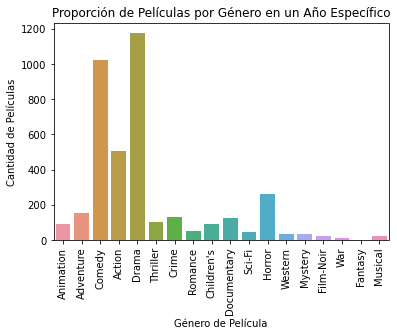

In [15]:
sns.countplot(x=datosp['Genere'])
plt.xlabel("Género de Película") # Nombre del eje x
plt.ylabel("Cantidad de Películas") # Nombre del eje y
plt.title("Proporción de Películas por Género en un Año Específico") # Título del gráfico
plt.xticks(rotation=90)
plt.show()

Drama: 30.29%
Comedy: 26.37%
Action: 12.95%
Horror: 6.75%
Adventure: 3.99%
Crime: 3.37%
Documentary: 3.17%
Thriller: 2.60%
Animation: 2.32%
Children's: 2.29%
Romance: 1.29%
Sci-Fi: 1.18%
Mystery: 0.93%
Western: 0.85%
Film-Noir: 0.64%
Musical: 0.64%
War: 0.31%
Fantasy: 0.05%


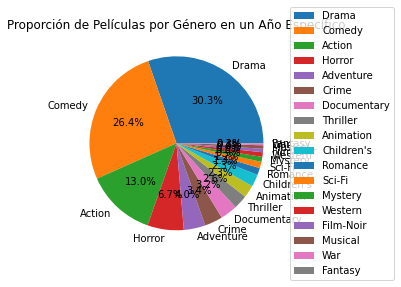

In [22]:
# Contar el número de películas por género
genre_counts = datosp['Genere'].value_counts()
total_peliculas = datosp.shape[0]

# Crear gráfico de pastel
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Proporción de Películas por Género en un Año Específico")
plt.legend(genre_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Imprimir nombres de géneros y porcentajes fuera del gráfico
for genre, count in genre_counts.items():
    porcentaje = count/total_peliculas * 100
    print(f"{genre}: {porcentaje:.2f}%")
    
plt.show()

Text(0.5, 1.0, 'Cambio en la cantidad de películas por género a lo largo del tiempo')

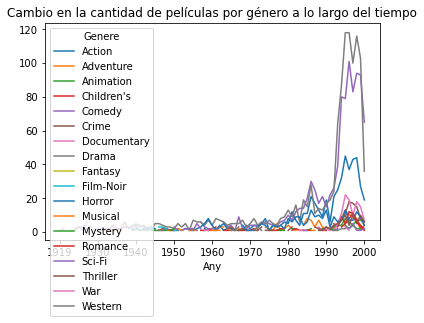

In [23]:
# Agrupar los datos por género y año
data_grouped = datosp.groupby(['Any', 'Genere']).size().reset_index(name='counts')

# Utilizar la función "unstack()" para mover los géneros a los índices
data_grouped = data_grouped.pivot(index='Any', columns='Genere', values='counts')

# Crear gráfico de línea para cada género
data_grouped.plot(kind='line')

# Añadir título y etiquetas a los ejes
plt.title("Cambio en la cantidad de películas por género a lo largo del tiempo")